In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import joblib

In [2]:
df = pd.read_csv('diamonds.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

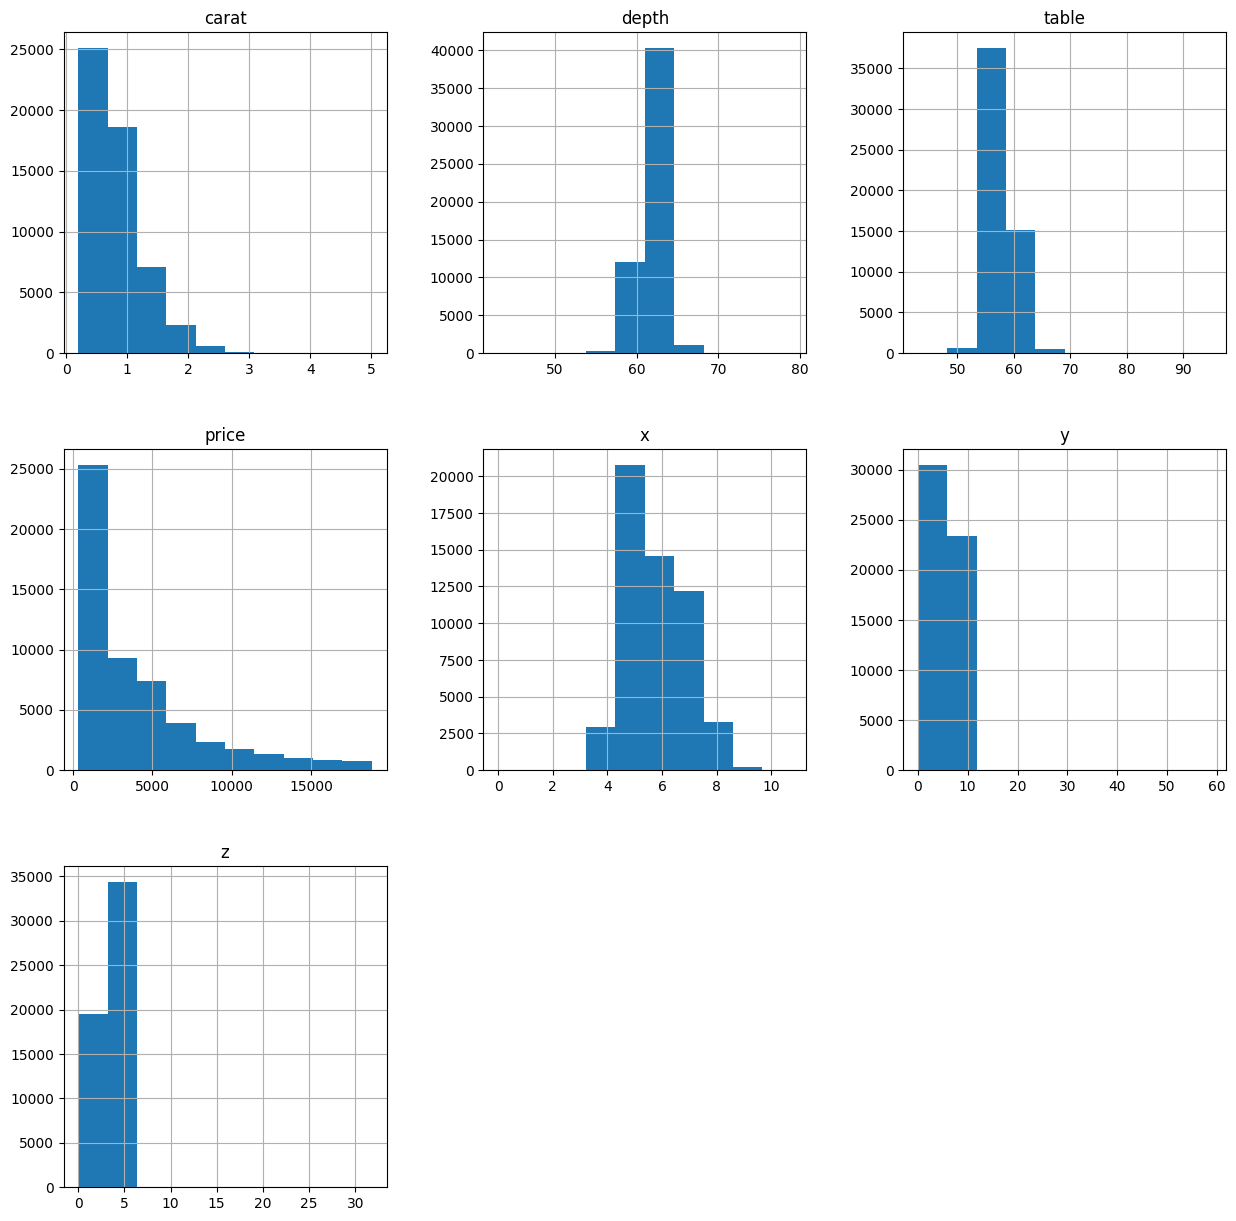

In [7]:
df.hist(figsize=(15,15))
plt.show()

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_6820\92780972.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['cut'],palette='rocket')


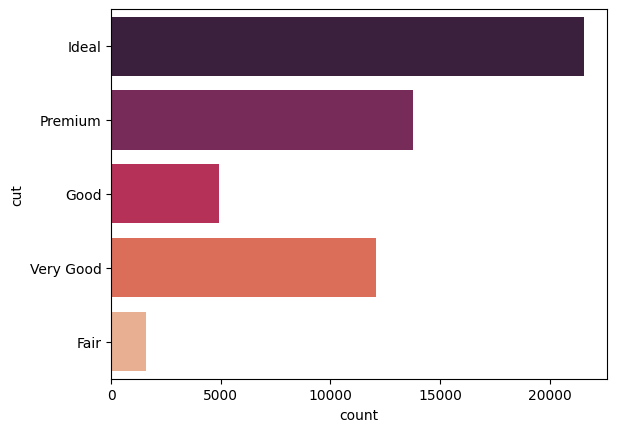

In [8]:
sns.countplot(df['cut'],palette='rocket')
plt.show()

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_6820\1929598694.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['color'],palette='rocket')


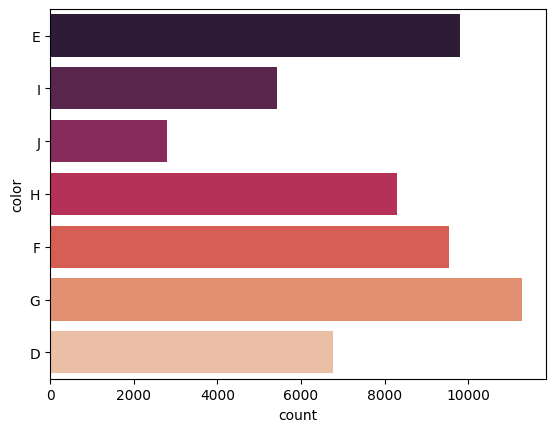

In [9]:
sns.countplot(df['color'],palette='rocket')
plt.show()

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_6820\232113666.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['clarity'],palette='rocket')


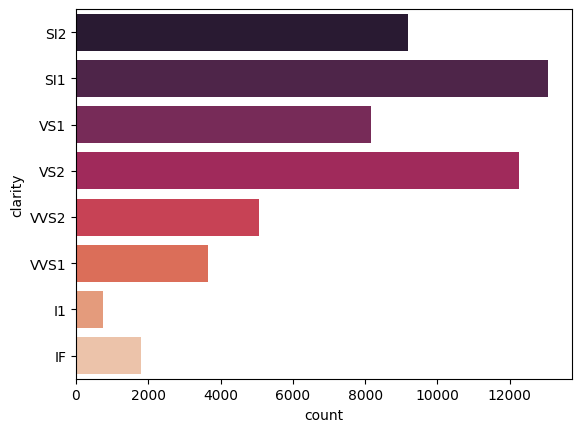

In [10]:
sns.countplot(df['clarity'],palette='rocket')
plt.show()

In [11]:
label = LabelEncoder()
df['clarity'] = label.fit_transform(df['clarity'])
df['color'] = label.fit_transform(df['color'])

df['cut'] = df['cut'].apply(lambda x: 0 if x=='Fair' else 1 if x=='Good' else 2 if x=='Very Good' else 3 if x=='Premium' else 4 if x=='Ideal' else 0)
df['x'] = df['x'].replace(0, df['x'].max())
df['y'] = df['y'].replace(0, df['y'].max())
df['z'] = df['z'].replace(0, df['z'].max())
df['Volume'] = round(round((df['x'].pow(2) + df['y'].pow(2) + df['z'].pow(2)) ** 0.5, 2) * df['depth'], 2)

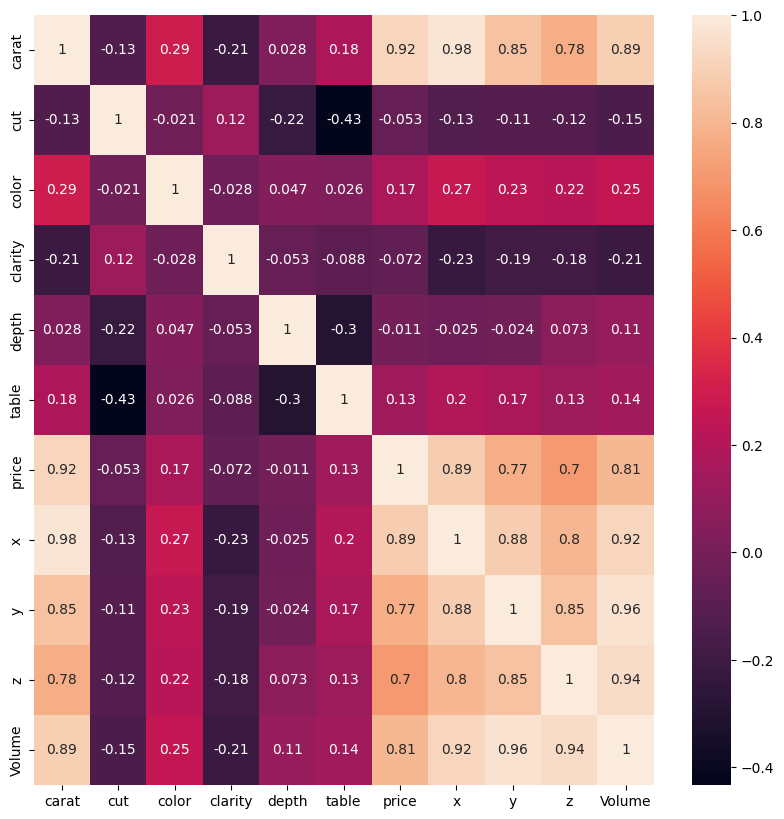

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
X = df.drop('price',axis=1)
y = df['price']

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y,test_size=0.2,random_state=39)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid,test_size=0.2,random_state=39)

In [14]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_valid = scale.transform(X_valid)
X_test = scale.transform(X_test)

In [15]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_valid)
score = round(model.score(X_valid,y_valid) * 100, 2)
mse = mean_squared_error(y_valid,y_pred)
rmse = np.sqrt(mse)
rmse , score

(np.float64(536.488576530966), 98.16)

In [16]:
random_params = {'bootstrap': [True,False],
                 'ccp_alpha': [0.0],
                 'criterion': ['gini','entropy','log_loss','squared_error'],
                 'max_depth': [None,1,2,8,10,15,20,50],
                 'max_features': [1.0],
                 'max_leaf_nodes': [None],
                 'max_samples': [None],
                 'min_impurity_decrease': [0.0],
                 'min_samples_leaf': [1,2,3,4,5,10],
                 'min_samples_split': [1,2,3,4,5,10],
                 'min_weight_fraction_leaf': [0.0],
                 'monotonic_cst': [None],
                 'n_estimators': [20,30,50,100,200,300],
                 'n_jobs': [None,1,2,3,10,20,30,],
                 'oob_score': [False],
                 'random_state': [None,39,42],
                 'verbose': [0],
                 'warm_start': [False]}

random_estimator = RandomizedSearchCV(model,random_params,scoring='neg_mean_squared_error',verbose=0)
random_estimator.fit(X_train,y_train)
finall_model = random_estimator.best_estimator_
y_pred = random_estimator.best_estimator_.predict(X_valid)
score = round(finall_model.score(X_valid,y_valid) * 100, 2)
mse = mean_squared_error(y_valid,y_pred)
rmse = np.sqrt(mse)
rmse , score

c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Mahdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

(np.float64(550.4421960609294), 98.06)

In [17]:
y_pred = finall_model.predict(X_test)
score = round(finall_model.score(X_test,y_test) * 100, 2)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse , score

(np.float64(599.848626160975), 97.78)

In [19]:
joblib.dump(finall_model,'model.pkl')

['model.pkl']